In [1]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
# Downloading train and test data sets of mnist dataset
BATCH_SIZE = 4

transforms = transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor()])

# download and create datasets
trainset = datasets.MNIST(root='mnist_data', train=True, transform=transforms, download=True)

testset = datasets.MNIST(root='mnist_data', train=False, transform=transforms)

# define the data loaders
trainloader = DataLoader(dataset=trainset, batch_size=BATCH_SIZE, shuffle=True)

testloader = DataLoader(dataset=testset, batch_size=BATCH_SIZE, shuffle=False)

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

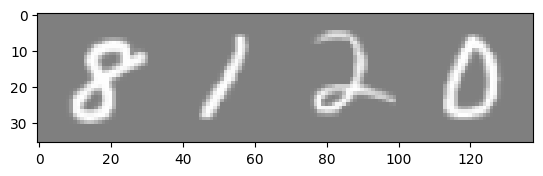

8     1     2     0    


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(BATCH_SIZE)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F

# Defining the Le-Net model for gray scale images with input channels as 1D not as 3D
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [5]:
import torch.optim as optim

# Initializing loss finction and auto weight and bias updater
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [6]:
# loop over the dataset for two times
for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()
#         print(inputs)

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.449
[1,  4000] loss: 0.285
[1,  6000] loss: 0.179
[1,  8000] loss: 0.134
[1, 10000] loss: 0.118
[1, 12000] loss: 0.111
[1, 14000] loss: 0.106
[2,  2000] loss: 0.085
[2,  4000] loss: 0.079
[2,  6000] loss: 0.072
[2,  8000] loss: 0.068
[2, 10000] loss: 0.070
[2, 12000] loss: 0.060
[2, 14000] loss: 0.057
Finished Training


In [7]:
outputs = net(images)

In [8]:
# Printing the first 4 output or predicted classes
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

Predicted:  8     1     2     0    


In [9]:
# Calculating the accuracy of model on test dataset
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print("Accuracy of the network on ", total ," test images:", 100*correct//total, "%")

Accuracy of the network on  10000  test images: 98 %


In [10]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: 0     is 99.6 %
Accuracy for class: 1     is 98.7 %
Accuracy for class: 2     is 99.0 %
Accuracy for class: 3     is 98.8 %
Accuracy for class: 4     is 98.0 %
Accuracy for class: 5     is 98.1 %
Accuracy for class: 6     is 97.1 %
Accuracy for class: 7     is 98.0 %
Accuracy for class: 8     is 98.6 %
Accuracy for class: 9     is 98.3 %


# Testing 2

In [11]:
import torch.nn as nn
import torch.nn.functional as F

# Defining the Le-Net model for gray scale images with input channels as 1D not as 3D
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 10)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 10)
        self.fc1 = nn.Linear(16 * 1 * 1, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [12]:
import torch.optim as optim

# Initializing loss finction and auto weight and bias updater
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [13]:
# loop over the dataset for two times

running_loss = 0.0
for i, data in enumerate(trainloader, 0):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data

    # zero the parameter gradients
    optimizer.zero_grad()
#         print(inputs)

    # forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999:    # print every 2000 mini-batches
        print(f'[{i + 1:5d}] loss: {running_loss / 2000:.3f}')
        running_loss = 0.0

print('Finished Training')

[ 2000] loss: 1.410
[ 4000] loss: 0.317
[ 6000] loss: 0.212
[ 8000] loss: 0.190
[10000] loss: 0.147
[12000] loss: 0.137
[14000] loss: 0.131
Finished Training


In [14]:
outputs = net(images)

In [15]:
# Printing the first 4 output or predicted classes
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

Predicted:  3     4     5     6    


In [16]:
# Calculating the accuracy of model on test dataset
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print("Accuracy of the network on ", total ," test images:", 100*correct//total, "%")

Accuracy of the network on  10000  test images: 96 %


In [17]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: 0     is 99.4 %
Accuracy for class: 1     is 98.9 %
Accuracy for class: 2     is 97.8 %
Accuracy for class: 3     is 97.3 %
Accuracy for class: 4     is 97.7 %
Accuracy for class: 5     is 97.1 %
Accuracy for class: 6     is 96.6 %
Accuracy for class: 7     is 92.9 %
Accuracy for class: 8     is 97.7 %
Accuracy for class: 9     is 92.3 %


There is no much accuracy difference in between the change of kernel sizes, for the first one took kernel size as 5, and for the next one took it as 10. Acccuracy with kernel size 5 is 98% and with kernel size 10 it is 97% <br>

Also decreased the for looping over the dataset to see the variation. Only 1% of accuracy difference between 2 times iterating the dataset. 